# Figure 5 - CoMight simulation



In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import math
from collections import defaultdict
from itertools import product
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import Parallel, delayed
from sklearn.metrics import roc_auc_score

seed = 12345
rng = np.random.default_rng(seed)

In [11]:
root_dir = Path("/Volumes/Extreme Pro/cancer/output/final_results/")

sim_names = ["mean_shiftv3", "multi_modalv2", "multi_equal"]

n_dims_1 = 512 - 6
n_samples = 1024
n_repeats = 100

# S@S98 Curve (Varying n_samples)

In [143]:
model_names = [
    "comight",
    "knn",
    "knn_viewone",
    "knn_viewtwo",
    # "might_viewone",
    # "might_viewtwo",
]

In [144]:
# varying n_samples
df = pd.DataFrame()

metric = "sas98"
for model in model_names:
    for sim_name in sim_names:
        fname = (
            root_dir
            / f"results_vs_nsamples_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
        )
        result_df = pd.read_csv(fname, index_col=None)

        # display(result_df.head())

        df = pd.concat((df, result_df), axis=0)

In [145]:
print(df.shape)
display(df.head())

(3600, 5)


,n_samples,sim_type,model,metric,metric_value
0,256,mean_shiftv3,comight,sas98,0.000000
1,256,mean_shiftv3,comight,sas98,0.031250
2,256,mean_shiftv3,comight,sas98,0.046875
3,256,mean_shiftv3,comight,sas98,0.000000
4,256,mean_shiftv3,comight,sas98,0.000000


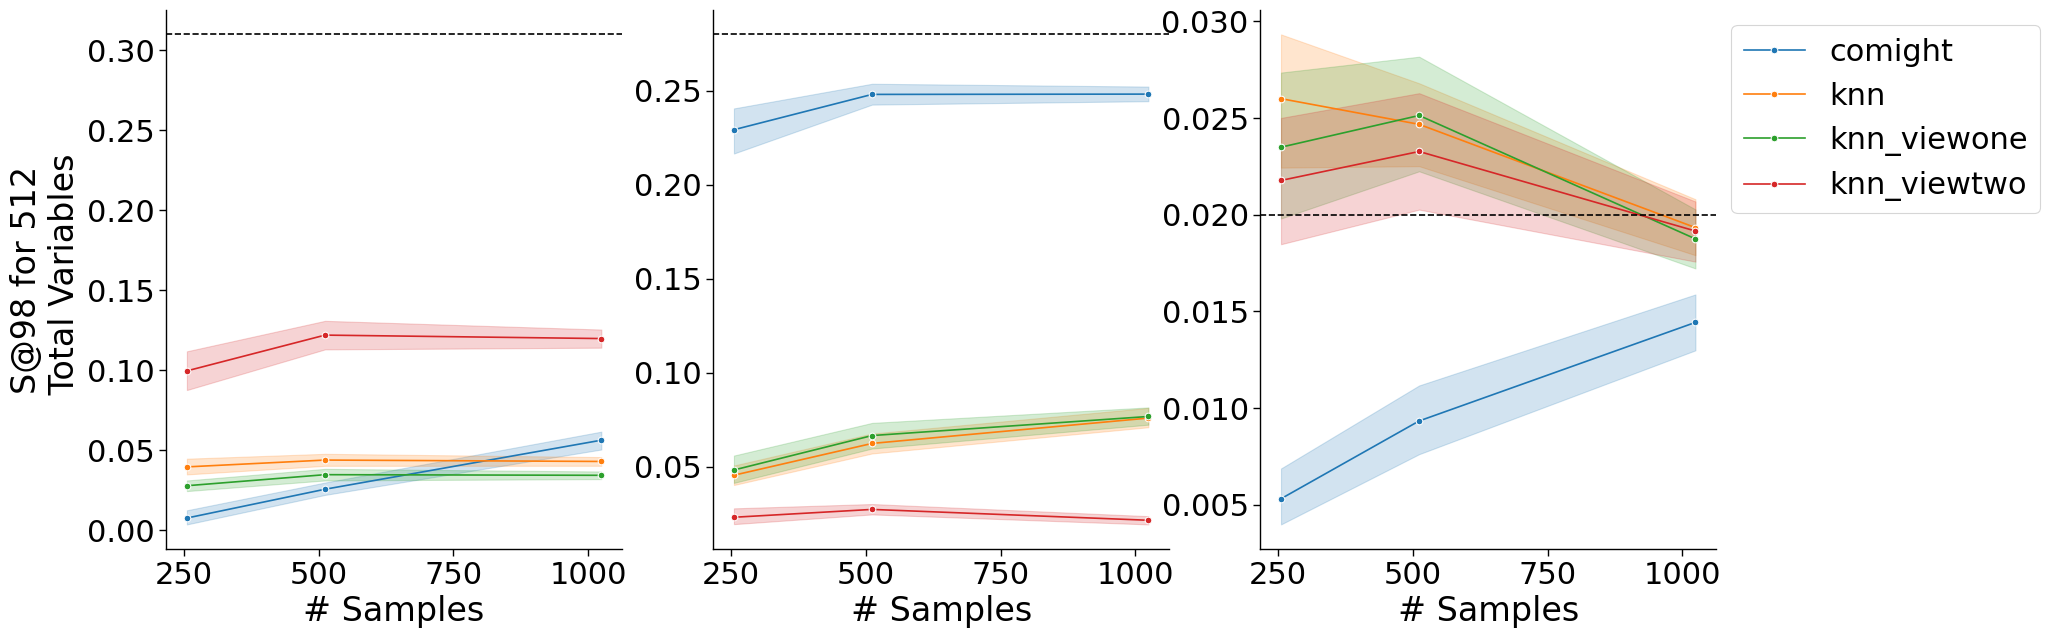

In [146]:
sns.set_context("paper", font_scale=2.5)

truths = {
    "mean_shiftv3": 0.31,
    "multi_modalv2": 0.28,
    "multi_equal": 0.02,
}

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
for idx, sim_name in enumerate(sim_names):
    plot_df = df[df["sim_type"] == sim_name]

    # palette = {"CoMIGHT": "red", "SVM": "orange", "kNN": "green", "LR": "blue"}
    ax = axs[idx]
    ax = sns.lineplot(
        data=plot_df,
        # x="n_features_2",
        x="n_samples",
        y="metric_value",
        marker="o",
        hue="model",
        ax=ax,
        # palette=palette,
        errorbar="ci",
    )

    ax.set_xlabel("# Samples")
    # ax.set(
    #     # ylim=(-0.02, 1.02),
    #     # ylim=[0.5, 1],
    #     # yticks=[0, 1],
    # )
    ax.axhline([truths[sim_name]], ls="--", color="black")
    sns.despine(right=True, ax=ax)
    # ax.set_xscale("log")
    ax.set_ylabel(None)
    ax.get_legend().set_visible(False)
axs[0].set_ylabel("S@98 for 512\n Total Variables")
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# S@S98 Curve (Varying n_dims)

In [102]:
model_names = [
    "comight",
    "knn",
    # "knn_viewone",
    # "knn_viewtwo",
    # "might_viewone",
    # "might_viewtwo",
    # "comight-perm",
]

In [109]:
# varying n_samples
df = pd.DataFrame()

metric = "sas98"
for model in model_names:
    for sim_name in sim_names[-1:]:
        fname = (
            root_dir
            / f"results_vs_ndims_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
        )
        result_df = pd.read_csv(fname, index_col=None)
        df = pd.concat((df, result_df), axis=0)

,n_dims_1,sim_type,model,metric,metric_value
0,512,multi_equal,comight,sas98,0.021484


,n_dims_1,sim_type,model,metric,metric_value
0,2,multi_equal,knn,sas98,0.015591
1,2,multi_equal,knn,sas98,0.017571
2,2,multi_equal,knn,sas98,0.017571
3,2,multi_equal,knn,sas98,0.015591
4,2,multi_equal,knn,sas98,0.021492


In [104]:
print(df.shape)
display(df.head())

(3356, 5)


,n_dims_1,sim_type,model,metric,metric_value
0,2,mean_shiftv3,comight,sas98,0.085938
1,2,mean_shiftv3,comight,sas98,0.103516
2,2,mean_shiftv3,comight,sas98,0.136719
3,2,mean_shiftv3,comight,sas98,0.085938
4,2,mean_shiftv3,comight,sas98,0.076172


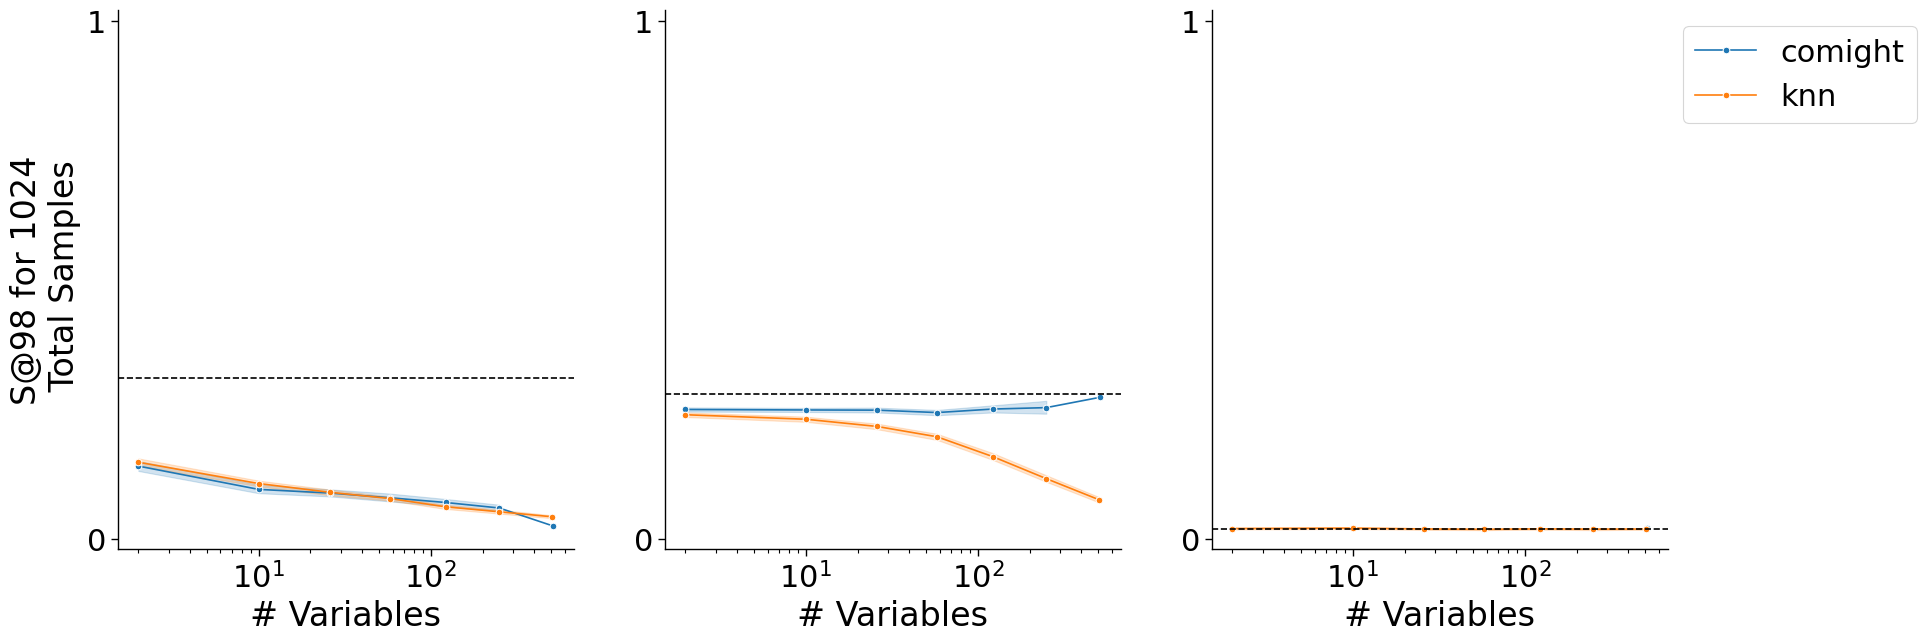

In [108]:
sns.set_context("paper", font_scale=2.5)

truths = {
    "mean_shiftv3": 0.31,
    "multi_modalv2": 0.28,
    "multi_equal": 0.02,
}

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
for idx, sim_name in enumerate(sim_names):
    plot_df = df[(df["sim_type"] == sim_name) & (df["n_dims_1"] < 1000)]

    # palette = {"CoMIGHT": "red", "SVM": "orange", "kNN": "green", "LR": "blue"}
    ax = axs[idx]
    ax = sns.lineplot(
        data=plot_df,
        # x="n_features_2",
        x="n_dims_1",
        y="metric_value",
        marker="o",
        hue="model",
        ax=ax,
        # palette=palette,
        errorbar="ci",
    )

    ax.set_xlabel("# Variables")
    ax.set(
        ylim=(-0.02, 1.02),
        # ylim=[0.5, 1],
        yticks=[0, 1],
    )
    ax.axhline([truths[sim_name]], ls="--", color="black")
    sns.despine(right=True, ax=ax)
    ax.set_xscale("log")
    # ax.set_ylabel(None)
    ax.set_ylabel(None)
    ax.get_legend().set_visible(False)
axs[0].set_ylabel("S@98 for 1024\n Total Samples")
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# CMI Curve (Varying n_samples)

In [27]:
model_names = [
    "comight-cmi",
    "ksg",
]

In [32]:
# varying n_samples
df = pd.DataFrame()

metric = "cmi"
for model in model_names:
    for sim_name in sim_names:
        fname = (
            root_dir
            / f"results_vs_nsamples_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
        )
        result_df = pd.read_csv(fname, index_col=None)
        df = pd.concat((df, result_df), axis=0)

In [33]:
print(df.shape)
display(df.head())

(3600, 5)


,n_samples,sim_type,model,metric,metric_value
0,256,mean_shiftv3,comight-cmi,cmi,0.004278
1,256,mean_shiftv3,comight-cmi,cmi,0.008220
2,256,mean_shiftv3,comight-cmi,cmi,0.014405
3,256,mean_shiftv3,comight-cmi,cmi,0.003665
4,256,mean_shiftv3,comight-cmi,cmi,0.015664


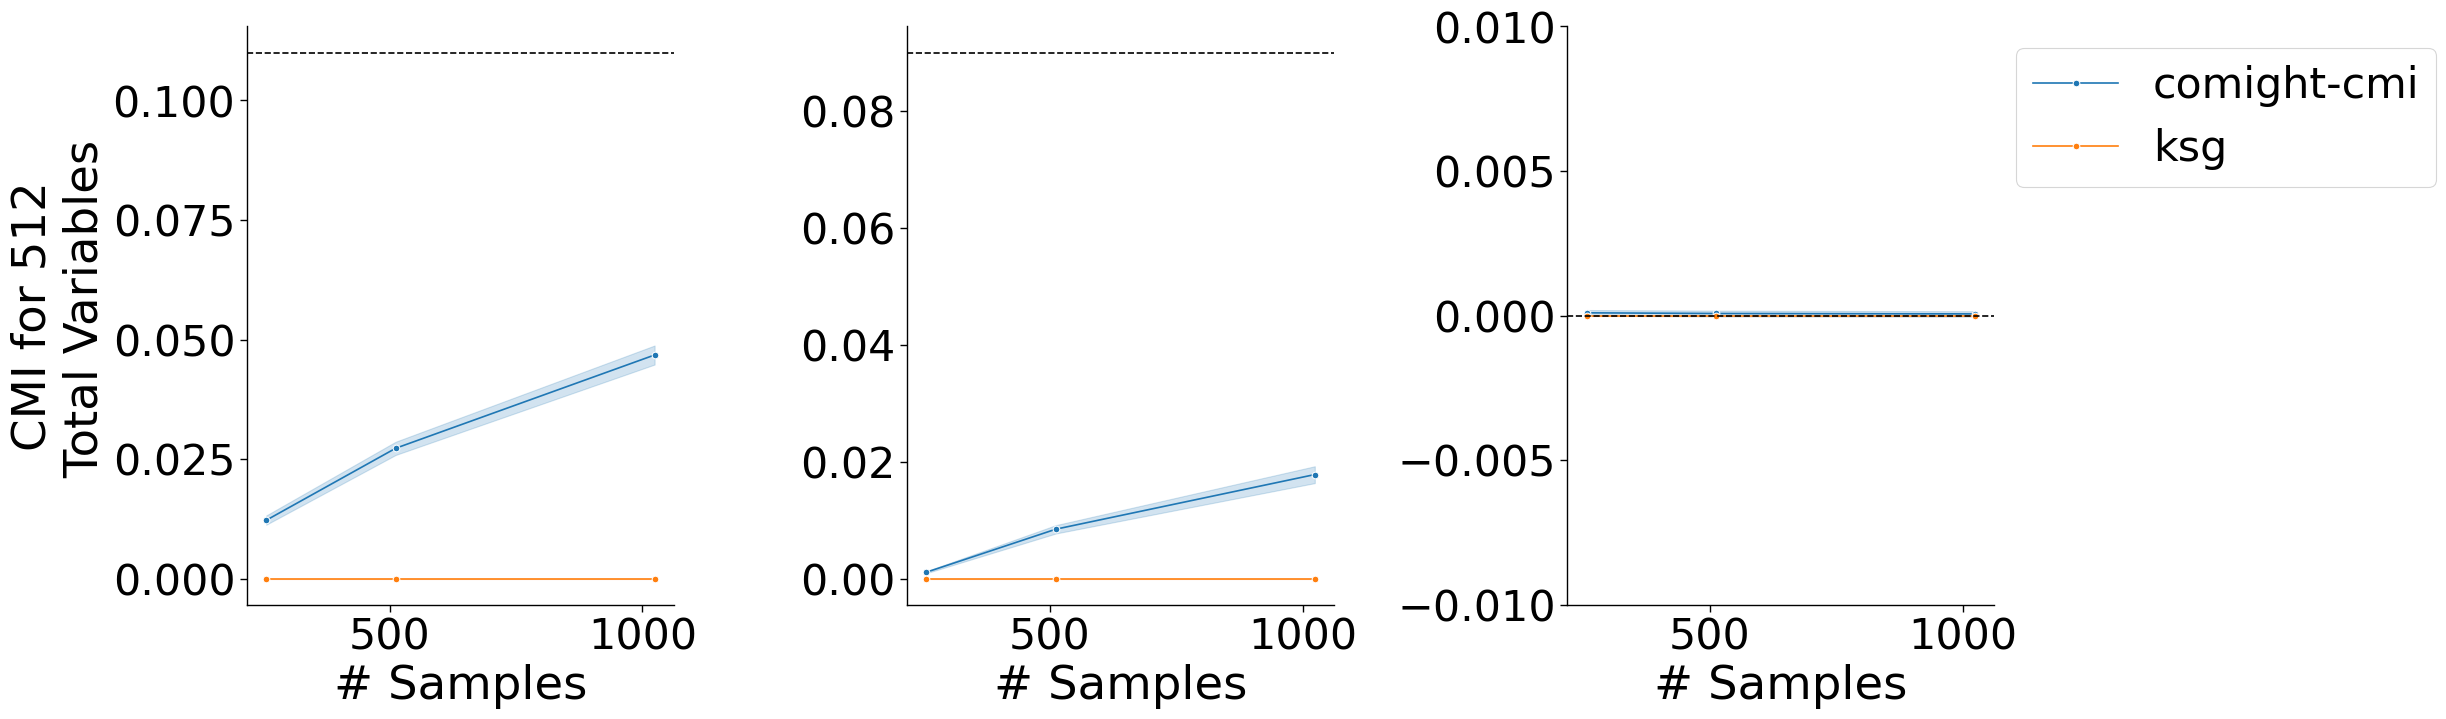

In [59]:
sns.set_context("paper", font_scale=3.5)

truths = {
    "mean_shiftv3": 0.11,
    "multi_modalv2": 0.09,
    "multi_equal": 0.0,
}

fig, axs = plt.subplots(1, 3, figsize=(25, 8))
for idx, sim_name in enumerate(sim_names):
    plot_df = df[df["sim_type"] == sim_name]
    ax = axs[idx]
    # palette = {"CoMIGHT": "red", "SVM": "orange", "kNN": "green", "LR": "blue"}

    ax = sns.lineplot(
        data=plot_df,
        # x="n_features_2",
        x="n_samples",
        y="metric_value",
        marker="o",
        hue="model",
        ax=ax,
        # palette=palette,
        errorbar="ci",
    )

    ax.set_xlabel("# Samples")
    # ax.set(
    #     ylim=(-0.02, 1.02),
    #     # ylim=[0.5, 1],
    #     # yticks=[0, 1],
    # )
    if sim_name == "multi_equal":
        ax.set(ylim=[-0.01, 0.01])
    ax.axhline([truths[sim_name]], ls="--", color="black")
    sns.despine(right=True, ax=ax)
    # ax.set_xscale("log")
    # ax.set_ylabel(None)
    ax.get_legend().set_visible(False)
    ax.set_ylabel(None)
axs[0].set_ylabel("CMI for 512\n Total Variables")
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()

# CMI for varying n_dims

In [60]:
model_names = [
    "comight-cmi",
    "ksg",
]

In [61]:
# varying n_samples
df = pd.DataFrame()

metric = "cmi"
for model in model_names:
    for sim_name in sim_names:
        fname = (
            root_dir
            / f"results_vs_ndims_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
        )
        result_df = pd.read_csv(fname, index_col=None)
        df = pd.concat((df, result_df), axis=0)

In [62]:
print(df.shape)
display(df.head())

(9494, 5)


,n_dims_1,sim_type,model,metric,metric_value
0,2,mean_shiftv3,comight-cmi,cmi,0.045454
1,2,mean_shiftv3,comight-cmi,cmi,0.040121
2,2,mean_shiftv3,comight-cmi,cmi,0.052129
3,2,mean_shiftv3,comight-cmi,cmi,0.040102
4,2,mean_shiftv3,comight-cmi,cmi,0.064757


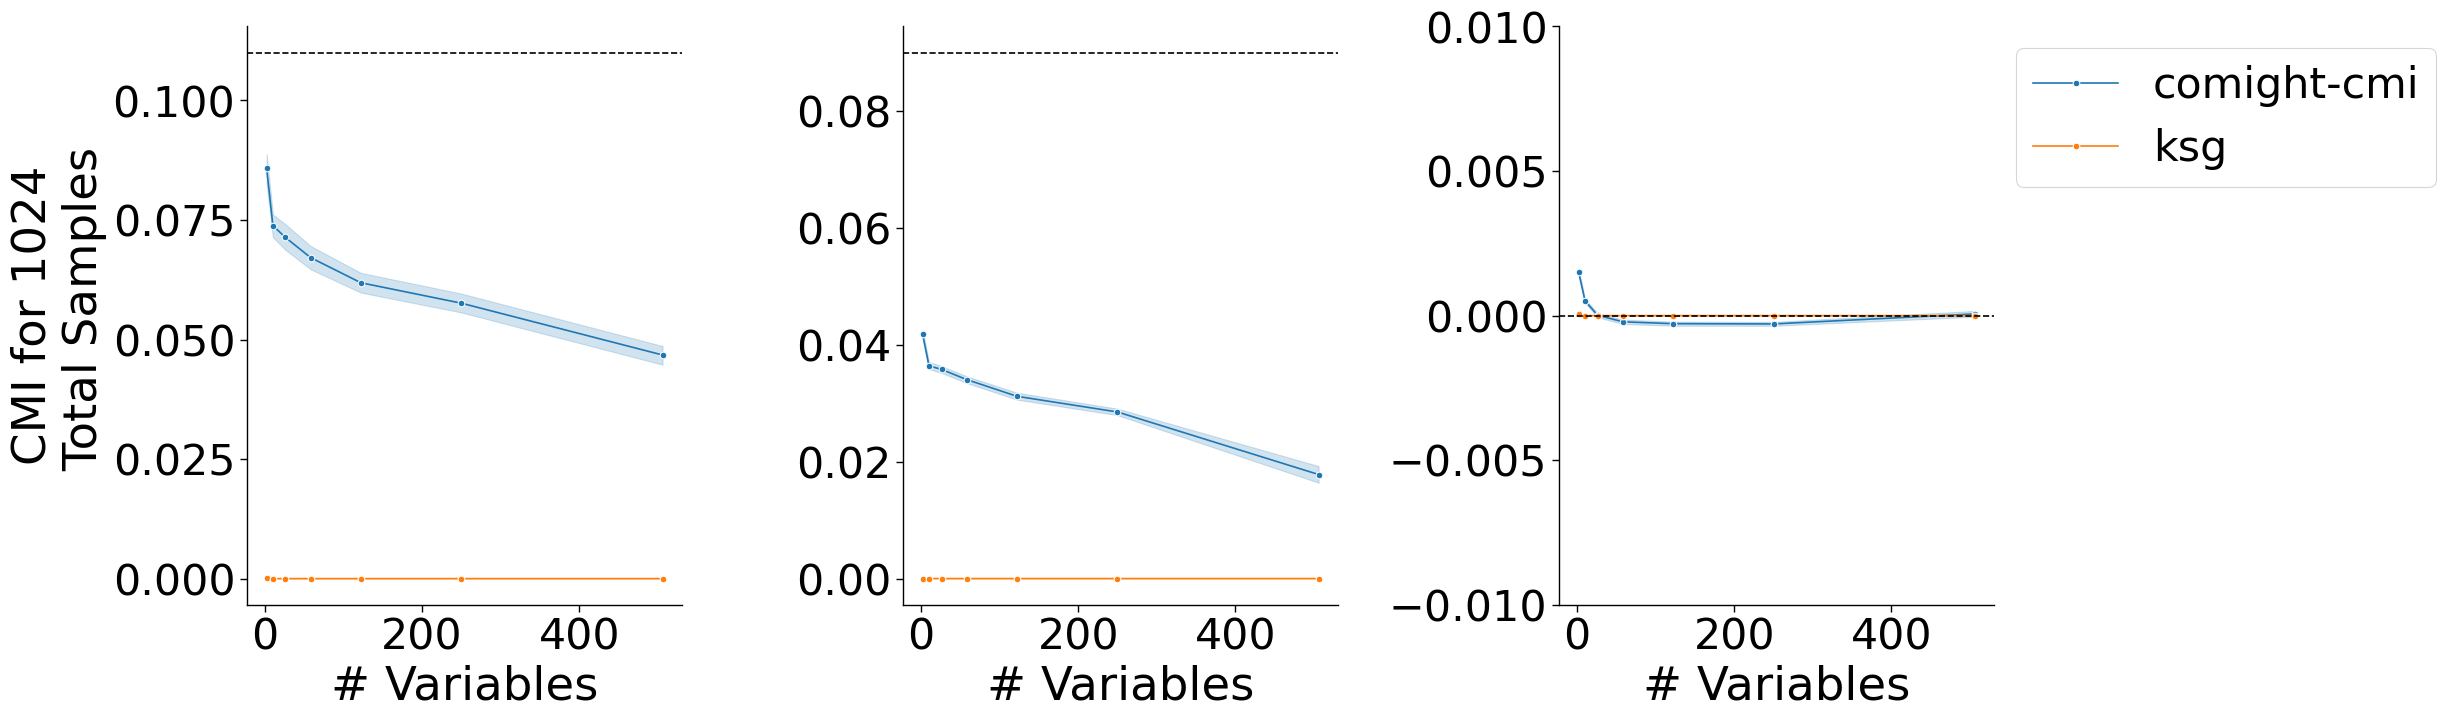

In [68]:
sns.set_context("paper", font_scale=3.5)

truths = {
    "mean_shiftv3": 0.11,
    "multi_modalv2": 0.09,
    "multi_equal": 0.0,
}

fig, axs = plt.subplots(1, 3, figsize=(25, 8))
for idx, sim_name in enumerate(sim_names):
    plot_df = df[(df["sim_type"] == sim_name) & (df["n_dims_1"] < 1000)]
    # plot_df["metric_value"] = plot_df["metric_value"]
    ax = axs[idx]
    # palette = {"CoMIGHT": "red", "SVM": "orange", "kNN": "green", "LR": "blue"}

    ax = sns.lineplot(
        data=plot_df,
        # x="n_features_2",
        x="n_dims_1",
        y="metric_value",
        marker="o",
        hue="model",
        ax=ax,
        # palette=palette,
        errorbar="ci",
    )

    ax.set_xlabel("# Variables")
    # ax.set(
    #     ylim=(-0.02, 1.02),
    #     # ylim=[0.5, 1],
    #     # yticks=[0, 1],
    # )
    if sim_name == "multi_equal":
        ax.set(ylim=[-0.01, 0.01])
    ax.axhline([truths[sim_name]], ls="--", color="black")
    sns.despine(right=True, ax=ax)
    # ax.set_xscale("log")
    # ax.set_ylabel(None)
    ax.get_legend().set_visible(False)
    ax.set_ylabel(None)
axs[0].set_ylabel("CMI for 1024\n Total Samples")
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()

# Power Curve (Varying n_samples)

In [201]:
# varying n_samples
cdcorr_df = pd.DataFrame()

metric = "cdcorr_pvalue"
model = "cdcorr"
for sim_name in sim_names:
    fname = (
        root_dir
        / f"results_vs_nsamples_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
    )
    df = pd.read_csv(fname, index_col=None)

    # convert pvalue to binary
    df["pvalue"] = df["metric_value"] <= 0.05

    print(
        df["pvalue"].sum(),
        df["pvalue"].count(),
        df["pvalue"].sum() / df["pvalue"].count(),
    )
    # compute power per sample size
    df = df.groupby("n_samples")["pvalue"].agg(["mean", "std"])
    df.columns = df.columns.map({"mean": "pvalue", "std": "pval_std"})
    df["model"] = "CDCorr"
    df["sim_type"] = sim_name
    df.reset_index(inplace=True)
    cdcorr_df = pd.concat((cdcorr_df, df), axis=0)

display(cdcorr_df)

29 200 0.145
26 200 0.13
30 200 0.15


,n_samples,pvalue,pval_std,model,sim_type
0,256,0.15,0.358870,CDCorr,mean_shiftv3
1,512,0.14,0.348735,CDCorr,mean_shiftv3
0,256,0.13,0.337998,CDCorr,multi_modalv2
1,512,0.13,0.337998,CDCorr,multi_modalv2
0,256,0.14,0.348735,CDCorr,multi_equal
1,512,0.16,0.368453,CDCorr,multi_equal


In [202]:
metric = "sas98"
comight_df = pd.DataFrame()
for sim_name in sim_names:
    model = "comight"
    fname = (
        root_dir
        / f"results_vs_nsamples_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
    )
    result_df = pd.read_csv(fname, index_col=None)

    model = "comight-perm"
    fname = (
        root_dir
        / f"results_vs_nsamples_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
    )
    perm_result_df = pd.read_csv(fname, index_col=None)

    pvalue_df = pd.concat((pvalue_df, result_df), axis=0)

    # Grouping the first dataframe by 'n_samples' and counting the number of rows for each 'n_samples'
    counts = perm_result_df.groupby("n_samples").size()

    # Filtering the rows in df1 where 'metric_value' is greater than or equal to the corresponding value in df2
    # perm_result_df = perm_result_df.iloc[0:1]
    filtered_df1 = result_df[
        result_df["metric_value"] >= perm_result_df["metric_value"]
    ]

    # Counting the number of filtered rows for each 'n_samples'
    filtered_counts = filtered_df1.groupby("n_samples").size()

    # Normalizing by dividing the filtered counts by the total counts
    normalized_counts = filtered_counts / counts
    pvalue_df = pd.DataFrame(normalized_counts, columns=["pvalue"])
    pvalue_df["model"] = "CoMIGHT"
    pvalue_df["sim_type"] = sim_name
    pvalue_df.reset_index(inplace=True)

    comight_df = pd.concat((comight_df, pvalue_df), axis=0)
    # display(comight_df)
# df = df.groupby("n_samples")["pvalue"].agg(["mean", "std"])
# df.columns = df.columns.map({"mean": "pvalue", "std": "pval_std"})
# df["model"] = "CoMIGHT"

In [203]:
display(perm_result_df.head())
display(result_df.head())

,n_samples,sim_type,model,metric,metric_value
0,256,multi_equal,comight-perm,sas98,0.023438
1,256,multi_equal,comight-perm,sas98,0.015625
2,256,multi_equal,comight-perm,sas98,0.007812
3,256,multi_equal,comight-perm,sas98,0.023438
4,256,multi_equal,comight-perm,sas98,0.007812


,n_samples,sim_type,model,metric,metric_value
0,256,multi_equal,comight,sas98,0.007812
1,256,multi_equal,comight,sas98,0.000000
2,256,multi_equal,comight,sas98,0.007812
3,256,multi_equal,comight,sas98,0.015625
4,256,multi_equal,comight,sas98,0.000000


In [204]:
df = pd.concat((cdcorr_df, comight_df), axis=0)

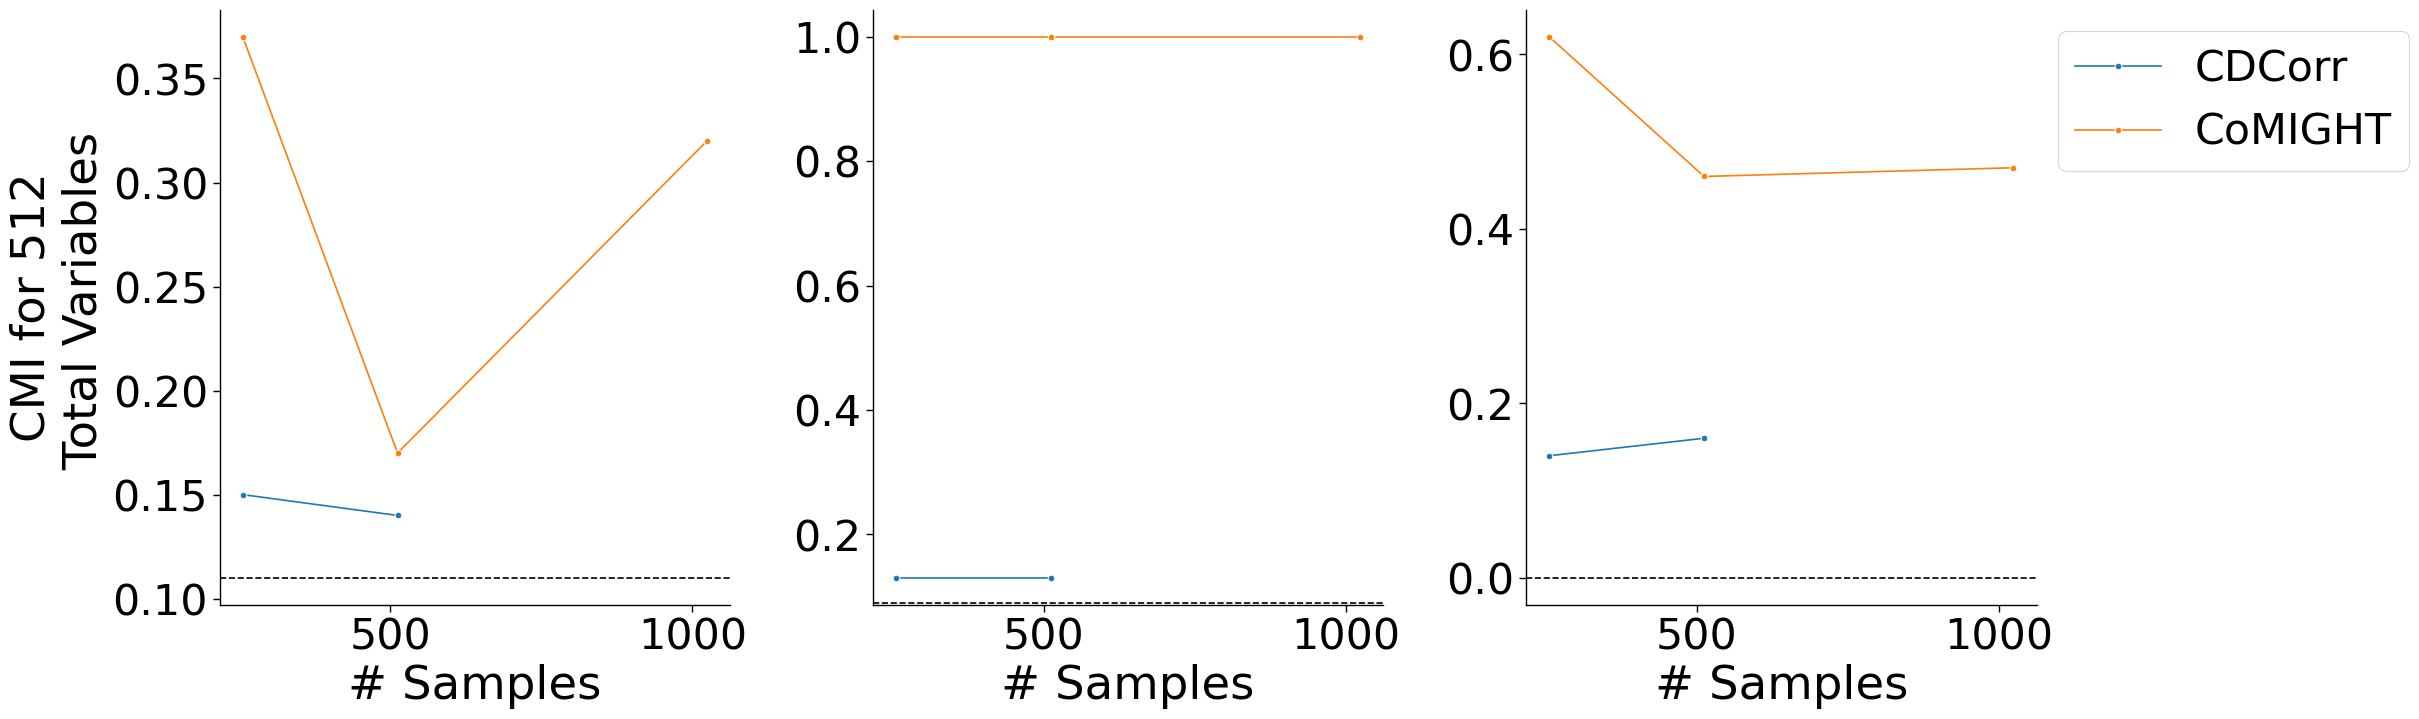

In [205]:
sns.set_context("paper", font_scale=3.5)

truths = {
    "mean_shiftv3": 0.11,
    "multi_modalv2": 0.09,
    "multi_equal": 0.0,
}

fig, axs = plt.subplots(1, 3, figsize=(25, 8))
for idx, sim_name in enumerate(sim_names):
    plot_df = df[(df["sim_type"] == sim_name)]
    # plot_df["metric_value"] = plot_df["metric_value"]
    ax = axs[idx]
    # palette = {"CoMIGHT": "red", "SVM": "orange", "kNN": "green", "LR": "blue"}

    ax = sns.lineplot(
        data=plot_df,
        # x="n_features_2",
        x="n_samples",
        y="pvalue",
        marker="o",
        hue="model",
        ax=ax,
        # palette=palette,
        errorbar="ci",
    )

    ax.set_xlabel("# Samples")
    # ax.set(
    #     ylim=(-0.02, 1.02),
    #     # ylim=[0.5, 1],
    #     # yticks=[0, 1],
    # )
    # if sim_name == "multi_equal":
    #     ax.set(ylim=[-0.01, 0.01])
    ax.axhline([truths[sim_name]], ls="--", color="black")
    sns.despine(right=True, ax=ax)
    # ax.set_xscale("log")
    # ax.set_ylabel(None)
    ax.get_legend().set_visible(False)
    ax.set_ylabel(None)
axs[0].set_ylabel("CMI for 512\n Total Variables")
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()

# Power Curve (Varying n_dims)

In [158]:
# varying n_samples
cdcorr_df = pd.DataFrame()

metric = "cdcorr_pvalue"
model = "cdcorr"
for sim_name in sim_names:
    fname = (
        root_dir
        / f"results_vs_ndims_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
    )
    df = pd.read_csv(fname, index_col=None)

    # convert pvalue to binary
    df["pvalue"] = df["metric_value"] <= 0.05

    print(
        df["pvalue"].sum(),
        df["pvalue"].count(),
        df["pvalue"].sum() / df["pvalue"].count(),
    )
    # compute power per sample size
    df = df.groupby("n_dims")["pvalue"].agg(["mean", "std"])
    df.columns = df.columns.map({"mean": "pvalue", "std": "pval_std"})
    df["model"] = "CDCorr"
    df["sim_type"] = sim_name
    df.reset_index(inplace=True)
    cdcorr_df = pd.concat((cdcorr_df, df), axis=0)

display(cdcorr_df)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Extreme Pro/cancer/output/final_results/results_vs_ndims_mean_shiftv3_cdcorr_cdcorr_pvalue_506_100.csv'

In [192]:
metric = "sas98"
comight_df = pd.DataFrame()
for sim_name in sim_names:
    model = "comight"
    fname = (
        root_dir
        / f"results_vs_ndims_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
    )
    result_df = pd.read_csv(fname, index_col=None)
    result_df = result_df[result_df["n_dims_1"] < 1000]

    model = "comight-perm"
    fname = (
        root_dir
        / f"results_vs_ndims_{sim_name}_{model}_{metric}_{n_dims_1}_{n_repeats}.csv"
    )
    perm_result_df = pd.read_csv(fname, index_col=None)
    perm_result_df = perm_result_df[perm_result_df["n_dims_1"] < 1000]

    pvalue_df = pd.concat((pvalue_df, result_df), axis=0)

    # Grouping the first dataframe by 'n_samples' and counting the number of rows for each 'n_samples'
    counts = perm_result_df.groupby("n_dims_1").size()

    print(perm_result_df.shape, result_df.shape)
    # Filtering the rows in df1 where 'metric_value' is greater than or equal to the corresponding value in df2
    # perm_result_df = perm_result_df.iloc[0:1]
    filtered_df1 = result_df[
        result_df["metric_value"] >= perm_result_df["metric_value"]
    ]

    # Counting the number of filtered rows for each 'n_samples'
    filtered_counts = filtered_df1.groupby("n_dims_1").size()

    # Normalizing by dividing the filtered counts by the total counts
    normalized_counts = filtered_counts / counts
    pvalue_df = pd.DataFrame(normalized_counts, columns=["pvalue"])
    pvalue_df["model"] = "CoMIGHT"
    pvalue_df["sim_type"] = sim_name
    pvalue_df.reset_index(inplace=True)

    comight_df = pd.concat((comight_df, pvalue_df), axis=0)
    # display(comight_df)
# df = df.groupby("n_samples")["pvalue"].agg(["mean", "std"])
# df.columns = df.columns.map({"mean": "pvalue", "std": "pval_std"})
# df["model"] = "CoMIGHT"

(700, 5) (700, 5)
(700, 5) (700, 5)
(700, 5) (700, 5)


In [193]:
display(perm_result_df.head())
display(result_df.head())

,n_dims_1,sim_type,model,metric,metric_value
0,2,multi_equal,comight-perm,sas98,0.007812
1,2,multi_equal,comight-perm,sas98,0.009766
2,2,multi_equal,comight-perm,sas98,0.019531
3,2,multi_equal,comight-perm,sas98,0.035156
4,2,multi_equal,comight-perm,sas98,0.021484


,n_dims_1,sim_type,model,metric,metric_value
0,2,multi_equal,comight,sas98,0.005859
1,2,multi_equal,comight,sas98,0.005859
2,2,multi_equal,comight,sas98,0.023438
3,2,multi_equal,comight,sas98,0.011719
4,2,multi_equal,comight,sas98,0.005859


In [194]:
df = pd.concat((comight_df,), axis=0)
print(df.shape)
display(df)

(21, 4)


,n_dims_1,pvalue,model,sim_type
0,2,0.74,CoMIGHT,mean_shiftv3
1,10,0.41,CoMIGHT,mean_shiftv3
2,26,0.45,CoMIGHT,mean_shiftv3
3,58,0.44,CoMIGHT,mean_shiftv3
4,122,0.39,CoMIGHT,mean_shiftv3
5,250,0.33,CoMIGHT,mean_shiftv3
6,506,0.32,CoMIGHT,mean_shiftv3
0,2,1.00,CoMIGHT,multi_modalv2
1,10,1.00,CoMIGHT,multi_modalv2
2,26,1.00,CoMIGHT,multi_modalv2


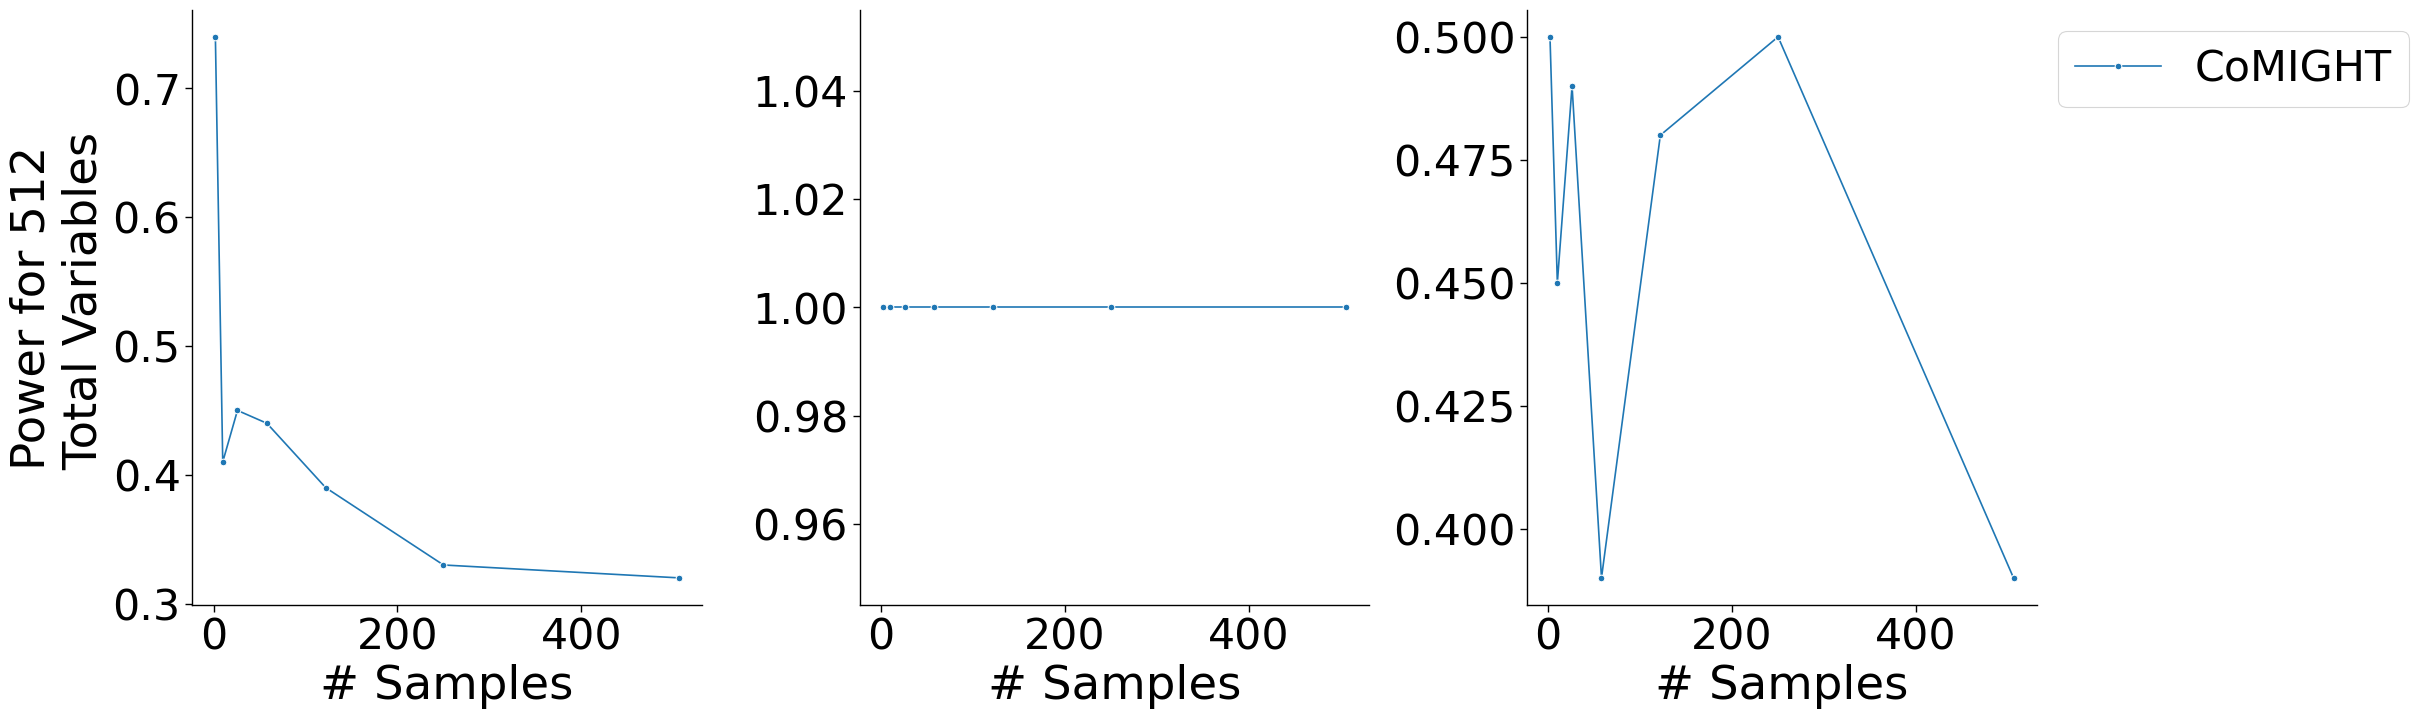

In [195]:
sns.set_context("paper", font_scale=3.5)

truths = {
    "mean_shiftv3": 0.11,
    "multi_modalv2": 0.09,
    "multi_equal": 0.0,
}

fig, axs = plt.subplots(1, 3, figsize=(25, 8))
for idx, sim_name in enumerate(sim_names):
    plot_df = df[(df["sim_type"] == sim_name)]
    # plot_df["metric_value"] = plot_df["metric_value"]
    ax = axs[idx]
    # palette = {"CoMIGHT": "red", "SVM": "orange", "kNN": "green", "LR": "blue"}

    ax = sns.lineplot(
        data=plot_df,
        # x="n_features_2",
        x="n_dims_1",
        y="pvalue",
        marker="o",
        hue="model",
        ax=ax,
        # palette=palette,
        errorbar="ci",
    )

    ax.set_xlabel("# Samples")
    # ax.set(
    #     ylim=(-0.02, 1.02),
    #     # ylim=[0.5, 1],
    #     # yticks=[0, 1],
    # )
    # if sim_name == "multi_equal":
    #     ax.set(ylim=[-0.01, 0.01])
    # ax.axhline([truths[sim_name]], ls="--", color="black")
    sns.despine(right=True, ax=ax)
    # ax.set_xscale("log")
    # ax.set_ylabel(None)
    ax.get_legend().set_visible(False)
    ax.set_ylabel(None)
axs[0].set_ylabel("Power for 512\n Total Variables")
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()